<a href="https://colab.research.google.com/github/GuilhermeNishimoto/cinetica_secagem/blob/main/modelagem_cinetica_secagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [52]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from google.colab import files

In [53]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Data Loading

In [54]:
df = pd.read_excel("dados_cinetica_secagem.xlsx")

In [55]:
x = df['time'].values
y = df['experimental'].values

# Modelos Matemáticos de Curva de Secagem:

#### Modelo de Newton

In [56]:
def modelo_newton(t, k):
    return np.exp(- k * t)

#### Modelo de Page

In [57]:
def modelo_page(t, k, n):
    return np.exp(- k * (t ** n))

#### Modelo de Midilli

In [58]:
def modelo_midilli(t, a, k, n, b):
    return a * np.exp(- k * (t ** n)) - (b * t)

#### Modelo de Page Modificado

In [59]:
def modelo_page_modificado(t, k, n):
    return np.exp(-((k * n) ** n))

#### Modelo de Weibull

In [60]:
def modelo_weibull(t, a, b):
    return np.exp(- ((t / a) ** b))

# Análises Estatísticas

#### Erro Médio

$$
SE = \left[ \frac{\sum_{\left( X_{experimental}  - X_{modelo}\right)^2}^{}}{n} \right]^\frac{1}{2}
$$

In [61]:
def erro_medio(df, col_exp, col_mod, n):
    return math.sqrt(pow(sum(df[col_exp] - df[col_mod]), 2)/n)

# Fitting

#### Modelo de Weibull

In [65]:
popt, pcov = curve_fit(
    f = modelo_weibull,
    xdata = x,
    ydata = y,
)

a, b = popt
n = len(popt)

y_weibull = modelo_weibull(x, a, b)

df['modelo_weibull'] = y_weibull

r2 = r2_score(y, y_weibull)

se = erro_medio(df, col_exp = 'experimental', col_mod = 'modelo_weibull', n = n)

print(
f'''
Estimated value of a: {a}
Estimated value of b: {b}
SE = {se}
'''
)


Estimated value of a: 43.80085824319294
Estimated value of b: 1.0636171106645202
SE = 0.12335201695061786



# Plotting

#### Modelo Weibull

In [90]:
def cria_grafico(df, col):

    # Define as dimensões do gráfico
    fig, ax = plt.subplots(figsize = (6, 4))

    # Gráfico de pontos
    ax1 = sns.scatterplot(
        data = df,
        x = 'time',
        y = 'experimental',
        color = 'black',
        label = 'Experimental',
        ax = ax # Argumento para que os gráficos dividam o eixo y 
    )

    # Gráfico de Linha
    ax2 = sns.lineplot(
        data = df,
        x = 'time',
        y = col,
        color = 'red',
        label = col,
        ax = ax # Argumento para que os gráficos dividam o eixo y 
    )

    # Renomeia os eixos x e y e o título do gráfico
    ax.set_xlabel("Tempo (minutos)", fontsize = 12)
    ax.set_ylabel("M (adimensional)", fontsize = 12)


    # Exclui a linha superior e a direita do gráfico
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend()

    # Salva a figura
    plt.savefig(f'{col}.png', format = 'png')

    # Download da imagem
    # files.download(f'{nome_grafico}.png')

    plt.show()

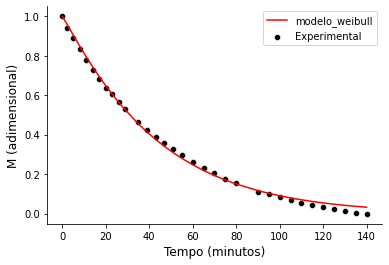

In [91]:
# cria_grafico(df, 'modelo_weibull')